In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import pprint
import datetime

import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('../data/input/train.csv')
test = pd.read_csv('../data/input/test.csv')
sample_sub = pd.read_csv('../data/input/sample_submit.csv', header=None, names=['id', 'mpg'])

train_test = pd.concat([train, test], ignore_index=True, sort=False)

# Relation of train, test, sample_submit

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   mpg           500 non-null    float64
 2   cylinders     500 non-null    int64  
 3   displacement  500 non-null    int64  
 4   horsepower    500 non-null    object 
 5   weight        500 non-null    int64  
 6   acceleration  500 non-null    float64
 7   model year    500 non-null    int64  
 8   origin        500 non-null    int64  
 9   car name      500 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 39.2+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   cylinders     500 non-null    int64  
 2   displacement  500 non-null    int64  
 3   horsepower    500 non-null    object 
 4   weight        500 non-null    int64  
 5   acceleration  500 non-null    float64
 6   model year    500 non-null    int64  
 7   origin        500 non-null    int64  
 8   car name      500 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 35.3+ KB


In [5]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      500 non-null    int64  
 1   mpg     500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


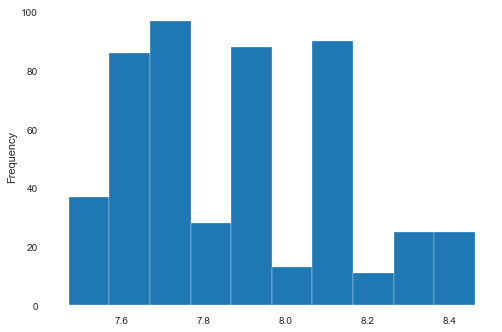

In [13]:
np.log(train['weight']).plot.hist()

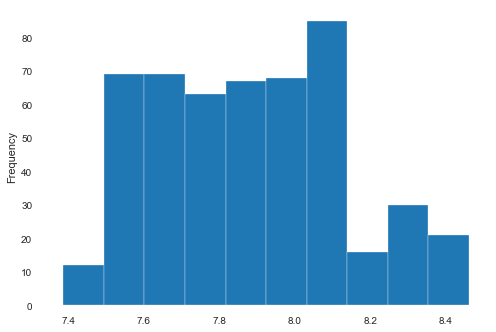

In [14]:
np.log(test['weight']).plot.hist()

In [6]:
(test['id'] == train['id']).any()

False

testとtrainのidは排他的

In [91]:
np.isin(test['id'], sample_sub['id'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

testとsample_submitは同じ

# Check Data
mpg: 燃費mile per gallon(target feature)  
cylinders: シリンダー   
diplacement: 排気量  
horsepower: 馬力  
weight: 重量  
acceleration: 加速度  
model year: 年式  
origin: 起源(原産)  
car name: 車名

In [7]:
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,3,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,4,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,7,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,9,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500


In [5]:
pdp.ProfileReport(train).to_file("../features/train_report.html")

In [6]:
pdp.ProfileReport(test).to_file("../features/test_report.html")

## correct horsepower

In [10]:
# 平均値を計算するために欠損値をNanに変換し、horsepower全体をfloatに変換する
train_test['horsepower'].replace('?', np.nan, inplace=True)
train_test['horsepower'] = train_test['horsepower'].astype(float)

# Car name

In [13]:
tmp = train_test['car name'].apply(lambda x: x.strip().split(' ')[0])
brands = tmp.unique()

for brand in brands:
    print('brand: ', brand)
    print(train_test.loc[train_test['car name'].str.startswith(brand), 'car name'].unique(), "\n")

brand:  dodge
['dodge aspen' 'dodge rampage' 'dodge monaco brougham' 'dodge aries se'
 'dodge colt' 'dodge magnum xe' 'dodge coronet custom' 'dodge omni'] 

brand:  mercury
['mercury cougar brougham' 'mercury capri 2000' 'mercury zephyr 6'] 

brand:  pontiac
['pontiac j2000 se hatchback' 'pontiac lemans v6' 'pontiac astro'] 

brand:  ford
['ford galaxie 500' 'ford futura' 'ford gran torino' 'ford pinto'
 'ford mustang ii 2+2' 'ford ltd' 'ford granada l' 'ford fairmont (man)'
 'ford gran torino (sw)' 'ford escort 4w' 'ford f108' 'ford fairmont'] 

brand:  vw
['vw rabbit custom' 'vw rabbit'] 

brand:  amc
['amc gremlin' 'amc pacer d/l' 'amc ambassador dpl' 'amc hornet'
 'amc matador' 'amc spirit dl' 'amc concord d/l'] 

brand:  datsun
['datsun 200sx' 'datsun 210' 'datsun 200-sx' 'datsun 710' 'datsun 210 mpg'
 'datsun 810 maxima' 'datsun pl510' 'datsun 510 (sw)' 'datsun 1200'
 'datsun f-10 hatchback'] 

brand:  renault
['renault lecar deluxe'] 

brand:  peugeot
['peugeot 505s turbo diesel

In [14]:
# before replace vw, vw is only used volkswagen's abbreviation??
train_test.loc[train_test['car name'].str.contains('vw')]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
6,13,17.250298,6,318,110.0,3205,19.228868,75,1,vw rabbit custom
25,57,28.102213,4,98,60.0,1760,13.512347,71,1,vw rabbit
48,96,23.008702,4,140,NaN,1760,19.472427,76,1,vw rabbit
100,191,27.764627,4,140,120.0,2408,19.408774,73,1,vw rabbit
119,227,22.729533,4,232,95.0,3193,13.249940,71,1,vw rabbit
165,335,27.682178,4,140,72.0,2408,19.388988,71,1,vw rabbit
183,371,17.606155,6,318,110.0,1925,19.485614,75,1,vw rabbit custom
199,405,22.782539,4,140,108.0,2200,17.428149,71,1,vw rabbit
202,411,22.891049,6,400,96.0,2200,13.222813,71,1,vw rabbit
224,454,28.146944,4,140,NaN,1760,19.420540,76,1,vw rabbit


## correct car name
correction spelling inconsistency

In [26]:
train_test['car name'] = train_test['car name'].str.replace('vw', 'volkswagen')
train_test['car name'] = train_test['car name'].str.replace('vokswagen', 'volkswagen')
train_test['car name'] = train_test['car name'].str.replace('toyouta', 'toyota')
train_test['car name'] = train_test['car name'].str.replace('chevy', 'chevrolet')
train_test['car name'] = train_test['car name'].str.replace('datsun 200-sx', 'datsun 200sx')

tmp = train_test['car name'].apply(lambda x: x.strip().split(' ')[0])
brands = tmp.unique()
for brand in brands:
    print('brand: ', brand)
    print(train_test.loc[train_test['car name'].str.startswith(brand), 'car name'].unique(), "\n")

brand:  dodge
['dodge aspen' 'dodge rampage' 'dodge monaco brougham' 'dodge aries se'
 'dodge colt' 'dodge magnum xe' 'dodge coronet custom' 'dodge omni'] 

brand:  mercury
['mercury cougar brougham' 'mercury capri 2000' 'mercury zephyr 6'] 

brand:  pontiac
['pontiac j2000 se hatchback' 'pontiac lemans v6' 'pontiac astro'] 

brand:  ford
['ford galaxie 500' 'ford futura' 'ford gran torino' 'ford pinto'
 'ford mustang ii 2+2' 'ford ltd' 'ford granada l' 'ford fairmont (man)'
 'ford gran torino (sw)' 'ford escort 4w' 'ford f108' 'ford fairmont'] 

brand:  volkswagen
['volkswagen rabbit custom' 'volkswagen rabbit'
 'volkswagen rabbit custom diesel' 'volkswagen dasher' 'volkswagen jetta'] 

brand:  amc
['amc gremlin' 'amc pacer d/l' 'amc ambassador dpl' 'amc hornet'
 'amc matador' 'amc spirit dl' 'amc concord d/l'] 

brand:  datsun
['datsun 200sx' 'datsun 210' 'datsun 710' 'datsun 210 mpg'
 'datsun 810 maxima' 'datsun pl510' 'datsun 510 (sw)' 'datsun 1200'
 'datsun f-10 hatchback'] 

bran

## check the detail
volkswagen rabbit custom, volkswagen rabbitの違いは？  
datsun 210, datsun 210 mpgの違いは？  
datsun pl510, datsun 510 (sw)の違いは？  
ford fairmont (man)とford fairmont, ford gran torino (sw)とford gran torinoの違いは？  
capriとmercuy capriの関係は？  

- volkswagen

In [139]:
tmp = train_test.loc[train_test['car name'].str.contains('volkswagen rabbit')]
display(tmp.sort_values('car name'))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
455,901,27.536418,4,140,NaN,1760,19.243466,76,1,volkswagen rabbit
487,970,27.725048,4,140,NaN,1760,19.532434,76,1,volkswagen rabbit
541,77,NaN,4,140,120.0,1760,19.534980,73,1,volkswagen rabbit
551,103,NaN,4,98,60.0,1760,19.317987,71,1,volkswagen rabbit
558,118,NaN,4,140,72.0,1760,19.257363,73,1,volkswagen rabbit
616,241,NaN,4,98,60.0,1760,19.489395,71,1,volkswagen rabbit
623,251,NaN,4,105,97.0,3233,15.389381,81,1,volkswagen rabbit
624,252,NaN,4,200,85.0,3193,17.395484,71,1,volkswagen rabbit
467,931,23.049267,4,140,72.0,2408,19.469530,73,1,volkswagen rabbit
673,344,NaN,4,140,120.0,2125,13.392269,71,1,volkswagen rabbit


In [140]:
tmp.groupby('car name').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
volkswagen rabbit,19.0,25.355355,2.780601,20.630073,22.771352,27.536418,27.895109,28.146944
volkswagen rabbit custom,5.0,17.378771,0.364460,16.792143,17.250298,17.606155,17.617604,17.627651
volkswagen rabbit custom diesel,1.0,44.680084,NaN,44.680084,44.680084,44.680084,44.680084,44.680084


各volkswagen rabbitはmpgに無視できない差があるので、個別に扱う

- datsun 210

In [141]:
tmp = train_test.loc[train_test['car name'].str.contains('datsun 210')]
display(tmp.sort_values('car name'))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
12,26,35.563606,4,97,67.0,1875,15.286051,80,1,datsun 210
837,670,NaN,8,225,170.0,3651,17.273280,76,1,datsun 210
809,614,NaN,4,134,92.0,1875,15.383592,71,1,datsun 210
786,569,NaN,8,318,90.0,3353,13.280340,76,1,datsun 210
779,546,NaN,8,97,139.0,3380,13.196309,78,1,datsun 210
674,345,NaN,4,140,72.0,2408,17.330561,76,1,datsun 210
647,301,NaN,6,258,100.0,2950,13.166613,76,1,datsun 210
627,258,NaN,4,144,85.0,1875,15.430374,74,3,datsun 210
622,250,NaN,8,225,71.0,3651,13.197177,76,1,datsun 210
602,214,NaN,4,134,100.0,1875,15.365979,74,1,datsun 210


In [142]:
tmp.groupby('car name').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 210,10.0,28.002577,6.552967,22.642545,22.807523,23.267343,35.469854,35.944872
datsun 210 mpg,14.0,35.258714,0.398810,34.444640,35.032348,35.252677,35.518255,36.021442


datsun 210のmpgの分布にdatsun 210 mpgのmpgの分布が包含されている  
datsun 210の分布のプラス側にdatsun 210 mpgの分布が小さい分散で分布している  
両者を1つとして扱ってもよさそう

- datsun 510

In [143]:
tmp = train_test.loc[train_test['car name'].str.contains('510')]
display(tmp.sort_values('car name'))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
984,975,NaN,4,80,67.0,2755,17.674119,80,3,datsun 510 (sw)
950,908,NaN,4,98,132.0,1875,17.485837,80,3,datsun 510 (sw)
938,883,NaN,4,85,67.0,2500,17.539432,80,3,datsun 510 (sw)
156,314,35.023099,4,80,67.0,1875,17.522647,80,3,datsun 510 (sw)
914,827,NaN,4,80,67.0,1875,15.308058,80,3,datsun 510 (sw)
610,231,NaN,4,80,67.0,3250,17.555989,80,3,datsun 510 (sw)
928,862,NaN,4,97,150.0,2125,13.347029,70,1,datsun pl510
915,830,NaN,4,121,150.0,2130,13.269737,70,1,datsun pl510
860,721,NaN,4,120,82.0,2125,9.981151,70,3,datsun pl510
844,685,NaN,4,97,150.0,2130,13.278327,70,1,datsun pl510


In [144]:
tmp.groupby('car name').mpg.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 510 (sw),1.0,35.023099,NaN,35.023099,35.023099,35.023099,35.023099,35.023099
datsun pl510,12.0,27.612702,2.037991,23.110340,28.280515,28.514728,28.556755,28.676262


In [145]:
tmp.groupby('car name').displacement.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 510 (sw),6.0,83.833333,7.222650,80.0,80.0,80.0,83.75,98.0
datsun pl510,22.0,105.545455,11.574715,97.0,97.0,97.0,120.00,121.0


In [146]:
tmp.groupby('car name').horsepower.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 510 (sw),6.0,77.833333,26.536139,67.0,67.0,67.0,67.0,132.0
datsun pl510,22.0,136.772727,22.713394,82.0,120.0,150.0,150.0,150.0


In [147]:
tmp.groupby('car name').weight.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 510 (sw),6.0,2355.000000,578.489412,1875.0,1875.0,2187.5,2691.25,3250.0
datsun pl510,22.0,2131.590909,13.218526,2125.0,2130.0,2130.0,2130.00,2190.0


In [148]:
tmp.groupby('car name').acceleration.describe()

,count,mean,std,min,25%,50%,75%,max
car name,,,,,,,,
datsun 510 (sw),6.0,17.181014,0.919763,15.308058,17.495040,17.531039,17.551850,17.674119
datsun pl510,22.0,13.541713,1.498643,9.981151,13.262147,13.313295,13.359463,17.635087


統一すべきかわからないので、保留

- ford fairmont

In [149]:
tmp = train_test.loc[train_test['car name'].str.contains('ford fairmont')]
display(tmp.sort_values('car name'))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
692,379,NaN,8,318,150.0,2720,13.448026,81,1,ford fairmont
192,393,23.469506,6,140,110.0,2815,18.267345,80,1,ford fairmont (man)
520,38,NaN,4,119,88.0,2300,15.057150,78,3,ford fairmont (man)
684,363,NaN,6,140,110.0,2815,18.169574,80,1,ford fairmont (man)
727,451,NaN,6,140,110.0,2815,18.175647,80,1,ford fairmont (man)
793,583,NaN,6,140,110.0,2815,17.935870,78,1,ford fairmont (man)
989,986,NaN,4,140,88.0,2050,15.137568,78,3,ford fairmont (man)


統一すべきかわからないので、保留

- ford gran torino

In [150]:
tmp = train_test.loc[train_test['car name'].str.contains('ford gran torino')]
display(tmp.sort_values('car name'))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,70,17.898707,8,302,150.0,2210,13.209801,79,1,ford gran torino
633,267,NaN,8,302,140.0,2774,13.244929,79,1,ford gran torino
737,467,NaN,8,318,140.0,2774,13.155203,79,1,ford gran torino
792,582,NaN,8,302,150.0,2210,13.177417,79,1,ford gran torino
352,707,17.848330,8,302,220.0,2774,15.165678,76,1,ford gran torino (sw)


spec的に違いがなさそうなので統一する

## correct car name

In [27]:
train_test['car name'] = train_test['car name'].str.replace('datsun 210 mpg', 'datsun 210')
train_test['car name'] = train_test['car name'].str.replace('ford gran torino (sw)', 'ford gran torino')
#train_test['car name'] = train_test['car name'].str.replace('ford fairmont (man)', 'ford fairmont')
#train_test['car name'] = train_test['car name'].str.replace('datsun 510 (sw)', 'datsun pl510')

tmp = train_test['car name'].apply(lambda x: x.strip().split(' ')[0])
brands = tmp.unique()
for brand in brands:
    print('brand: ', brand)
    print(train_test.loc[train_test['car name'].str.startswith(brand), 'car name'].unique(), "\n")

brand:  dodge
['dodge aspen' 'dodge rampage' 'dodge monaco brougham' 'dodge aries se'
 'dodge colt' 'dodge magnum xe' 'dodge coronet custom' 'dodge omni'] 

brand:  mercury
['mercury cougar brougham' 'mercury capri 2000' 'mercury zephyr 6'] 

brand:  pontiac
['pontiac j2000 se hatchback' 'pontiac lemans v6' 'pontiac astro'] 

brand:  ford
['ford galaxie 500' 'ford futura' 'ford gran torino' 'ford pinto'
 'ford mustang ii 2+2' 'ford ltd' 'ford granada l' 'ford fairmont (man)'
 'ford gran torino (sw)' 'ford escort 4w' 'ford f108' 'ford fairmont'] 

brand:  volkswagen
['volkswagen rabbit custom' 'volkswagen rabbit'
 'volkswagen rabbit custom diesel' 'volkswagen dasher' 'volkswagen jetta'] 

brand:  amc
['amc gremlin' 'amc pacer d/l' 'amc ambassador dpl' 'amc hornet'
 'amc matador' 'amc spirit dl' 'amc concord d/l'] 

brand:  datsun
['datsun 200sx' 'datsun 210' 'datsun 710' 'datsun 810 maxima'
 'datsun pl510' 'datsun 510 (sw)' 'datsun 1200' 'datsun f-10 hatchback'] 

brand:  renault
['rena

## create brand

In [28]:
train_test['car_brand'] = train_test['car name'].apply(lambda x: x.strip().split(' ')[0])
display(train_test.head(10))

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand
0,0,23.059782,6,140,110.0,2815,17.977429,80,1,dodge aspen,dodge
1,3,17.674521,8,350,150.0,4456,13.514535,72,1,dodge rampage,dodge
2,4,17.136353,8,302,140.0,2774,13.209912,79,1,mercury cougar brougham,mercury
3,7,22.664666,6,400,85.0,2190,15.196381,71,1,pontiac j2000 se hatchback,pontiac
4,9,17.872018,8,429,220.0,2245,9.621400,70,1,ford galaxie 500,ford
5,11,23.405007,6,140,110.0,2815,18.152362,80,1,dodge aspen,dodge
6,13,17.250298,6,318,110.0,3205,19.228868,75,1,volkswagen rabbit custom,volkswagen
7,16,35.469676,4,140,165.0,2145,13.519583,82,1,amc gremlin,amc
8,19,22.839820,6,200,85.0,3193,17.215803,71,1,dodge monaco brougham,dodge
9,23,36.489563,4,104,60.0,2000,14.899884,81,1,datsun 200sx,datsun


# Horse power

In [8]:
train_test['horsepower'].unique()

array([110., 150., 140.,  85., 220., 165.,  60.,  nan,  90.,  67.,  97.,
        72., 122., 139.,  88., 100., 105.,  54.,  71.,  78.,  75., 148.,
       130.,  95.,  70., 112.,  69., 132., 120., 108.,  74.,  96.,  61.,
       193.,  58.,  82.,  80., 145.,  64., 135., 190., 113.,  62.,  92.,
       170., 153.,  63.,  86.])

In [155]:
train_test[train_test['horsepower'].isnull()]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand
10,24,44.763897,4,85,NaN,1755,17.503013,80,2,renault lecar deluxe,renault
48,96,23.008702,4,140,NaN,1760,19.472427,76,1,volkswagen rabbit,volkswagen
224,454,28.146944,4,140,NaN,1760,19.420540,76,1,volkswagen rabbit,volkswagen
286,574,44.021790,4,85,NaN,1955,20.795175,80,2,pontiac astro,pontiac
320,645,44.410105,4,85,NaN,1955,21.057837,80,2,pontiac astro,pontiac
407,815,28.048825,4,140,NaN,1760,19.139558,71,1,volkswagen rabbit,volkswagen
415,831,28.079580,4,140,NaN,1760,17.268393,82,1,volkswagen rabbit,volkswagen
455,901,27.536418,4,140,NaN,1760,19.243466,76,1,volkswagen rabbit,volkswagen
487,970,27.725048,4,140,NaN,1760,19.532434,76,1,volkswagen rabbit,volkswagen
598,206,NaN,4,85,NaN,4274,20.917523,78,2,ford pinto,ford


horsepowerに欠損値"?"を含んでいる車名のデータをそれぞれ眺めてみる

In [156]:
tmp = train_test[train_test['car name'] == 'renault lecar deluxe']
display(tmp)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand
10,24,44.763897,4,85,NaN,1755,17.503013,80,2,renault lecar deluxe,renault
94,180,43.745138,4,85,74.0,1755,17.349589,80,1,renault lecar deluxe,renault
530,54,NaN,4,85,74.0,1835,17.519205,80,2,renault lecar deluxe,renault
611,235,NaN,4,85,74.0,1875,17.453700,80,2,renault lecar deluxe,renault
749,489,NaN,4,90,120.0,2125,17.894257,77,3,renault lecar deluxe,renault
840,676,NaN,4,90,120.0,4165,15.653980,77,3,renault lecar deluxe,renault
907,814,NaN,4,85,NaN,1755,17.537356,80,1,renault lecar deluxe,renault
929,863,NaN,4,85,110.0,1875,17.451905,81,1,renault lecar deluxe,renault


In [158]:
tmp = train_test[(train_test['car name'] == 'volkswagen rabbit')]
display(tmp)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand
25,57,28.102213,4,98,60.0,1760,13.512347,71,1,volkswagen rabbit,volkswagen
48,96,23.008702,4,140,NaN,1760,19.472427,76,1,volkswagen rabbit,volkswagen
100,191,27.764627,4,140,120.0,2408,19.408774,73,1,volkswagen rabbit,volkswagen
119,227,22.729533,4,232,95.0,3193,13.249940,71,1,volkswagen rabbit,volkswagen
165,335,27.682178,4,140,72.0,2408,19.388988,71,1,volkswagen rabbit,volkswagen
199,405,22.782539,4,140,108.0,2200,17.428149,71,1,volkswagen rabbit,volkswagen
202,411,22.891049,6,400,96.0,2200,13.222813,71,1,volkswagen rabbit,volkswagen
224,454,28.146944,4,140,NaN,1760,19.420540,76,1,volkswagen rabbit,volkswagen
265,543,20.630073,4,360,97.0,2957,15.216479,78,1,volkswagen rabbit,volkswagen
299,600,22.502001,4,140,72.0,1760,19.363757,71,1,volkswagen rabbit,volkswagen


In [159]:
tmp = train_test[(train_test['car name']=='pontiac astro') ]
display(tmp)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand
54,110,35.689554,4,135,67.0,1875,15.320127,80,1,pontiac astro,pontiac
72,136,34.653274,4,98,97.0,1875,15.253095,81,1,pontiac astro,pontiac
86,164,34.293665,4,135,97.0,1875,15.303308,81,1,pontiac astro,pontiac
101,192,35.206474,4,135,97.0,1875,15.308270,76,1,pontiac astro,pontiac
257,532,34.707063,4,135,97.0,1875,15.294612,81,1,pontiac astro,pontiac
263,541,34.671249,4,135,97.0,1875,15.279381,81,1,pontiac astro,pontiac
283,570,33.528057,4,135,97.0,1875,15.331362,81,1,pontiac astro,pontiac
286,574,44.021790,4,85,NaN,1955,20.795175,80,2,pontiac astro,pontiac
320,645,44.410105,4,85,NaN,1955,21.057837,80,2,pontiac astro,pontiac
325,657,34.660724,4,135,97.0,1875,15.286648,81,1,pontiac astro,pontiac


## correct horsepower

In [29]:
# car name毎のhorse powerの平均値を計算(nanは計算外)
name_hp_mean = train_test.groupby('car name').horsepower.mean()
df_hp_isnull = train_test[train_test['horsepower'].isnull()]

# nan位置のtrainデータのhorse powerを置換する
for i in df_hp_isnull.index:
    train_test.loc[i, 'horsepower'] = name_hp_mean[df_hp_isnull.loc[i, 'car name']]

print("null horsepower is replaced: \n")
display(train_test.loc[df_hp_isnull.index])

null horsepower is replaced: 



,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand
10,24,44.763897,4,85,95.333333,1755,17.503013,80,2,renault lecar deluxe,renault
48,96,23.008702,4,140,85.923077,1760,19.472427,76,1,volkswagen rabbit,volkswagen
224,454,28.146944,4,140,85.923077,1760,19.420540,76,1,volkswagen rabbit,volkswagen
286,574,44.021790,4,85,97.878788,1955,20.795175,80,2,pontiac astro,pontiac
320,645,44.410105,4,85,97.878788,1955,21.057837,80,2,pontiac astro,pontiac
407,815,28.048825,4,140,85.923077,1760,19.139558,71,1,volkswagen rabbit,volkswagen
415,831,28.079580,4,140,85.923077,1760,17.268393,82,1,volkswagen rabbit,volkswagen
455,901,27.536418,4,140,85.923077,1760,19.243466,76,1,volkswagen rabbit,volkswagen
487,970,27.725048,4,140,85.923077,1760,19.532434,76,1,volkswagen rabbit,volkswagen
598,206,NaN,4,85,82.920000,4274,20.917523,78,2,ford pinto,ford


## Encoding Categorical Features

In [30]:
train_test['car_name_code'] = LabelEncoder().fit_transform(train_test['car name'])
train_test['car_brand_code'] =LabelEncoder().fit_transform(train_test['car_brand'])
train_test.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand,car_name_code,car_brand_code
0,0,23.059782,6,140,110.0,2815,17.977429,80,1,dodge aspen,dodge,33,6
1,3,17.674521,8,350,150.0,4456,13.514535,72,1,dodge rampage,dodge,39,6
2,4,17.136353,8,302,140.0,2774,13.209912,79,1,mercury cougar brougham,mercury,59,11
3,7,22.664666,6,400,85.0,2190,15.196381,71,1,pontiac j2000 se hatchback,pontiac,72,16
4,9,17.872018,8,429,220.0,2245,9.621400,70,1,ford galaxie 500,ford,47,8
5,11,23.405007,6,140,110.0,2815,18.152362,80,1,dodge aspen,dodge,33,6
6,13,17.250298,6,318,110.0,3205,19.228868,75,1,volkswagen rabbit custom,volkswagen,85,21
7,16,35.469676,4,140,165.0,2145,13.519583,82,1,amc gremlin,amc,2,0
8,19,22.839820,6,200,85.0,3193,17.215803,71,1,dodge monaco brougham,dodge,37,6
9,23,36.489563,4,104,60.0,2000,14.899884,81,1,datsun 200sx,datsun,25,5


# Origin

- car brand, originの関係を見てみる

In [61]:
# origin毎にどんなcar brandがあるか
for i in range(3):
    print("origin = ", i+1)
    pprint.pprint(np.sort(train_test.loc[train_test['origin']==i+1, 'car_brand'].unique()))

origin =  1
array(['amc', 'audi', 'buick', 'capri', 'chevrolet', 'datsun', 'dodge',
       'fiat', 'ford', 'hi', 'honda', 'mercury', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'toyota',
       'triumph', 'volkswagen'], dtype=object)
origin =  2
array(['amc', 'audi', 'buick', 'chevrolet', 'datsun', 'dodge', 'ford',
       'honda', 'mercury', 'oldsmobile', 'opel', 'pontiac', 'renault',
       'saab', 'volkswagen'], dtype=object)
origin =  3
array(['amc', 'audi', 'buick', 'capri', 'chevrolet', 'datsun', 'dodge',
       'ford', 'mercury', 'peugeot', 'plymouth', 'pontiac', 'renault',
       'toyota', 'volvo'], dtype=object)


In [62]:
# car brandそれぞれがどんなoriginを取り得るか
np.sort(train_test.set_index(['car_brand', 'origin']).index.unique())

array([('amc', 1), ('amc', 2), ('amc', 3), ('audi', 1), ('audi', 2),
       ('audi', 3), ('buick', 1), ('buick', 2), ('buick', 3),
       ('capri', 1), ('capri', 3), ('chevrolet', 1), ('chevrolet', 2),
       ('chevrolet', 3), ('datsun', 1), ('datsun', 2), ('datsun', 3),
       ('dodge', 1), ('dodge', 2), ('dodge', 3), ('fiat', 1), ('ford', 1),
       ('ford', 2), ('ford', 3), ('hi', 1), ('honda', 1), ('honda', 2),
       ('mercury', 1), ('mercury', 2), ('mercury', 3), ('oldsmobile', 1),
       ('oldsmobile', 2), ('opel', 1), ('opel', 2), ('peugeot', 1),
       ('peugeot', 3), ('plymouth', 1), ('plymouth', 3), ('pontiac', 1),
       ('pontiac', 2), ('pontiac', 3), ('renault', 1), ('renault', 2),
       ('renault', 3), ('saab', 1), ('saab', 2), ('toyota', 1),
       ('toyota', 3), ('triumph', 1), ('volkswagen', 1),
       ('volkswagen', 2), ('volvo', 3)], dtype=object)

In [60]:
# dictで表示を変えてみる
d = {}
for (brand, origin) in train_test.set_index(['car_brand', 'origin']).index.unique():
    d.setdefault(brand, []).append(origin)
pprint.pprint(d)

{'amc': [1, 3, 2],
 'audi': [2, 3, 1],
 'buick': [3, 1, 2],
 'capri': [3, 1],
 'chevrolet': [1, 3, 2],
 'datsun': [1, 3, 2],
 'dodge': [1, 2, 3],
 'fiat': [1],
 'ford': [1, 2, 3],
 'hi': [1],
 'honda': [1, 2],
 'mercury': [1, 2, 3],
 'oldsmobile': [1, 2],
 'opel': [2, 1],
 'peugeot': [1, 3],
 'plymouth': [1, 3],
 'pontiac': [1, 2, 3],
 'renault': [2, 1, 3],
 'saab': [2, 1],
 'toyota': [1, 3],
 'triumph': [1],
 'volkswagen': [1, 2],
 'volvo': [3]}


origin=1のみとなるのは、fiat(Italy), hi, triumph(England)  
origin=2のみとなるのは、なし  
origin=3のみとなるのは、volvo(Sweden)

- car name, originの関係を見てみる

In [63]:
# origin毎にどんなcar nameがあるか
for i in range(3):
    print("origin = ", i+1)
    pprint.pprint(np.sort(train_test.loc[train_test['origin']==i+1, 'car name'].unique()))

origin =  1
array(['amc concord d/l', 'amc gremlin', 'amc hornet', 'amc matador',
       'amc spirit dl', 'audi 5000s (diesel)', 'buick century',
       'buick century limited', 'buick lesabre custom', 'buick skyhawk',
       'buick skylark limited', 'capri ii', 'chevrolet caprice classic',
       'chevrolet chevelle malibu classic', 'chevrolet impala',
       'chevrolet monte carlo s', 'chevrolet monza 2+2', 'chevrolet nova',
       'chevrolet vega', 'chevrolet woody', 'datsun 1200', 'datsun 200sx',
       'datsun 210', 'datsun 710', 'datsun 810 maxima',
       'datsun f-10 hatchback', 'datsun pl510', 'dodge aries se',
       'dodge aspen', 'dodge colt', 'dodge coronet custom',
       'dodge monaco brougham', 'dodge omni', 'dodge rampage',
       'fiat 124 sport coupe', 'fiat 128', 'ford escort 4w', 'ford f108',
       'ford fairmont', 'ford fairmont (man)', 'ford futura',
       'ford galaxie 500', 'ford gran torino', 'ford gran torino (sw)',
       'ford granada l', 'ford ltd', 'for

In [64]:
# dictで表示を変えてみる
d = {}
for (name, origin) in train_test.set_index(['car name', 'origin']).index.unique():
    d.setdefault(name, []).append(origin)
pprint.pprint(d)

{'amc ambassador dpl': [2],
 'amc concord d/l': [1],
 'amc gremlin': [1, 2],
 'amc hornet': [1],
 'amc matador': [3, 1],
 'amc pacer d/l': [3],
 'amc spirit dl': [3, 1],
 'audi 5000s (diesel)': [2, 3, 1],
 'buick century': [3, 1, 2],
 'buick century limited': [1, 2],
 'buick lesabre custom': [1],
 'buick regal sport coupe (turbo)': [3, 2],
 'buick skyhawk': [2, 1, 3],
 'buick skylark limited': [1],
 'capri ii': [3, 1],
 'chevrolet c20': [2],
 'chevrolet caprice classic': [1, 2],
 'chevrolet chevelle malibu classic': [1],
 'chevrolet impala': [1],
 'chevrolet monte carlo s': [1],
 'chevrolet monza 2+2': [1],
 'chevrolet nova': [1, 3],
 'chevrolet vega': [1, 3],
 'chevrolet woody': [1],
 'datsun 1200': [1],
 'datsun 200sx': [1, 3, 2],
 'datsun 210': [1, 3, 2],
 'datsun 510 (sw)': [3],
 'datsun 710': [1],
 'datsun 810 maxima': [1],
 'datsun f-10 hatchback': [1],
 'datsun pl510': [1, 3],
 'dodge aries se': [1],
 'dodge aspen': [1],
 'dodge colt': [1],
 'dodge coronet custom': [1],
 'dodge 

## resplit train, test

In [31]:
tmp = train_test.drop(['car name', 'car_brand'], axis=1)
test_treated = tmp[tmp['mpg'].isnull()]
train_treated = tmp.dropna(subset=['mpg'], axis=0)

In [32]:
train_treated

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name_code,car_brand_code
0,0,23.059782,6,140,110.0,2815,17.977429,80,1,33,6
1,3,17.674521,8,350,150.0,4456,13.514535,72,1,39,6
2,4,17.136353,8,302,140.0,2774,13.209912,79,1,59,11
3,7,22.664666,6,400,85.0,2190,15.196381,71,1,72,16
4,9,17.872018,8,429,220.0,2245,9.621400,70,1,47,8
...,...,...,...,...,...,...,...,...,...,...,...
495,981,22.798447,4,140,148.0,2835,13.477573,82,1,25,5
496,983,35.173640,4,97,67.0,2234,17.542681,80,3,69,15
497,994,17.825448,8,302,220.0,2774,15.177189,76,1,81,20
498,995,28.545147,4,97,150.0,2130,13.324669,70,1,31,5


In [42]:
test_treated

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name_code,car_brand_code
500,1,NaN,4,98,67.0,2000,15.049795,81,1,65,14
501,2,NaN,4,97,90.0,2720,15.339172,79,1,33,6
502,5,NaN,4,90,75.0,2807,17.821599,77,1,37,6
503,6,NaN,4,140,110.0,2807,13.780354,82,2,9,2
504,8,NaN,4,121,85.0,3070,13.688921,73,2,75,18
...,...,...,...,...,...,...,...,...,...,...,...
995,992,NaN,4,225,105.0,3870,15.376311,76,1,21,4
996,993,NaN,4,140,112.0,2720,13.616843,82,1,9,2
997,996,NaN,8,318,110.0,2774,13.272636,75,1,51,8
998,998,NaN,4,90,75.0,2807,17.792560,77,1,37,6


In [53]:
train_X = train_treated.drop('mpg', axis=1)
train_y = train_treated['mpg']
model = LinearRegression().fit(train_X, train_y)

print("determination R^2: ", model.score(train_X, train_y))

determination R^2:  0.6571294824057836


In [77]:
submission = pd.DataFrame({'id':sample_sub.id, 'mpg':model.predict(test_treated.drop('mpg', axis=1))})
submission

,id,mpg
0,1,31.091431
1,2,30.481902
2,5,30.823703
3,6,32.791746
4,8,28.540995
...,...,...
495,992,28.556628
496,993,30.608923
497,996,18.727823
498,998,30.916493


## Output files(submission, feature:train, test, model)

In [85]:
dt = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')

In [86]:
# submission
submission.to_csv(
    '../data/output/sub_' + dt + '_LinearReg.csv',
    header=False,
    index=False
)

# train, test
train_treated.to_pickle(
    '../features/feature_train_' + dt + '_treated.pkl'
)
test_treated.to_pickle(
    '../features/feature_test_' + dt + '_treated.pkl'
)

# model
pickle.dump(model, open('../models/model_' + dt + '_LinearReg.pickle', 'wb'))